In [1]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from dl_ts_models.main import create_classifier
from drowsiness_detection import config
from drowsiness_detection.data import load_experiment_data
from drowsiness_detection.models import ThreeDStandardScaler

In [2]:
# load data
config.set_paths(30, 10)
X_train, X_test, y_train, y_test, cv_splits = load_experiment_data(
    exclude_by="a",
    num_targets=2,
    seed=45,
    test_size=.2,
    split_by_subjects=True,
    use_dummy_data=False,
    nn_experiment=True,
    feature_col_indices=(5, 8, 9, 14, 15, 16, 19),
    model_name="mvts_transformer")

X_train shape: (29012, 300, 7), y_train shape: (29012,)
X_test shape: (7094, 300, 7), y_test shape: (7094,)


In [3]:
num_samples = 500
X_train = X_train[:num_samples]
X_test = X_test[:num_samples]
y_test = y_test[:num_samples]
y_train = y_train[:num_samples]



In [4]:
scaler = ThreeDStandardScaler(feature_axis=-1)

X_train_scaled = scaler.fit_transform(X_train, y_train)
X_test_scaled = scaler.transform(X_test)

input_shape = (None, 300, 7)


In [5]:
    # transform the labels from integers to one hot vectors
nb_classes = 2
y_train = to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)
y_test.shape

(500, 2)

In [6]:
# base_path = config.SOURCES_ROOT_PATH.parent.joinpath("data/gcloud_dataset/30sec/")
# np.save(base_path.joinpath("x_test.npy"), X_test_scaled)
# np.save(base_path.joinpath("x_train.npy"), X_train_scaled)
# np.save(base_path.joinpath("y_test.npy"), y_test)
# np.save(base_path.joinpath("y_train.npy"), y_train)
X_test.shape

(500, 300, 7)

In [7]:
model = create_classifier(
    classifier_name="resnet",
    input_shape=input_shape[1:],
    nb_classes=nb_classes,
    output_directory=str(config.SOURCES_ROOT_PATH.parent.joinpath("data/resnet_experiments")) + "/",
    verbose=True,
)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 7)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 300, 64)      3648        ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 300, 64)     256         ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 300, 64)      0           ['batch_normalization[0][0]']

In [8]:
metrics = model.fit(x_train=X_train, y_train=y_train, x_val=X_test, y_val=y_test,
                    nb_epochs=1, batch_size=64,
                    class_weight=None
                    )
print(metrics)

10/10 [==============================] - 9s 680ms/step - loss: 0.3056 - accuracy: 0.8560 - val_loss: 2.4526 - val_accuracy: 0.7620 - lr: 0.0010
saving results to  /home/tim/IM/data/resnet_experiments/
   precision  accuracy  recall  duration
0      0.381     0.762     0.5  8.706196


/home/tim/IM/venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:
y_pred = model.predict(X_test, y_test, return_df_metrics=False)

In [10]:
y_pred

array([[1.24850158e-05, 9.99987483e-01],
       [1.28921674e-05, 9.99987125e-01],
       [2.43136164e-05, 9.99975681e-01],
       [2.63324928e-05, 9.99973655e-01],
       [2.71780191e-05, 9.99972820e-01],
       [2.91142715e-05, 9.99970913e-01],
       [2.27036835e-05, 9.99977350e-01],
       [2.61586683e-05, 9.99973893e-01],
       [3.25537549e-05, 9.99967456e-01],
       [3.42650637e-05, 9.99965787e-01],
       [4.08950073e-05, 9.99959111e-01],
       [3.81047394e-05, 9.99961853e-01],
       [4.14942078e-05, 9.99958515e-01],
       [3.69809932e-05, 9.99963045e-01],
       [3.40086954e-05, 9.99966025e-01],
       [3.13308119e-05, 9.99968648e-01],
       [2.99232088e-05, 9.99970078e-01],
       [2.52372574e-05, 9.99974728e-01],
       [2.88023784e-05, 9.99971151e-01],
       [5.30558500e-05, 9.99946952e-01],
       [5.65143164e-05, 9.99943495e-01],
       [4.19804655e-06, 9.99995828e-01],
       [4.85698729e-06, 9.99995112e-01],
       [5.15425381e-05, 9.99948502e-01],
       [3.233063

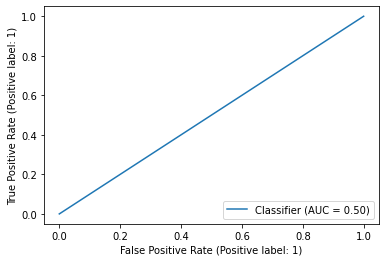

In [13]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_pred=np.argmax(y_pred, axis=1), y_true=np.argmax(y_test, axis=1), pos_label=1)
